In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [182]:
data = pd.read_csv("house_prices.csv")
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


After getting header we can see that date, city, country, street, zip type of data can't be processed with linear regression and used in data in this way. As the main goal of the project is to evaluate the price of the house in any city, we should extract country, street, zip and change format of date. We'll use city later and then extract it too

In [183]:
data.info()
data.dropna()
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].apply(lambda x: x.timestamp())
print(data.columns)
print(data.dtypes)


data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,1.398989e+09,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,1.398989e+09,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,1.398989e+09,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,1.398989e+09,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,1.398989e+09,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


Now, we shall make a hypothesis, that will additionally prove that there exist price trends across all cities, let's take waterfront as an example. Hypothesis: Houses with the same amount of bedrooms (we will take 3), but which have waterfront will have a greater median price across cities.

       city  median_waterfront  median_non_waterfront
0   Seattle          1765000.0               640000.0
1    Renton                0.0               417000.0
2  Bellevue          4881250.0               799000.0
3   Redmond                NaN               700000.0
4  Issaquah          2200000.0               639888.0


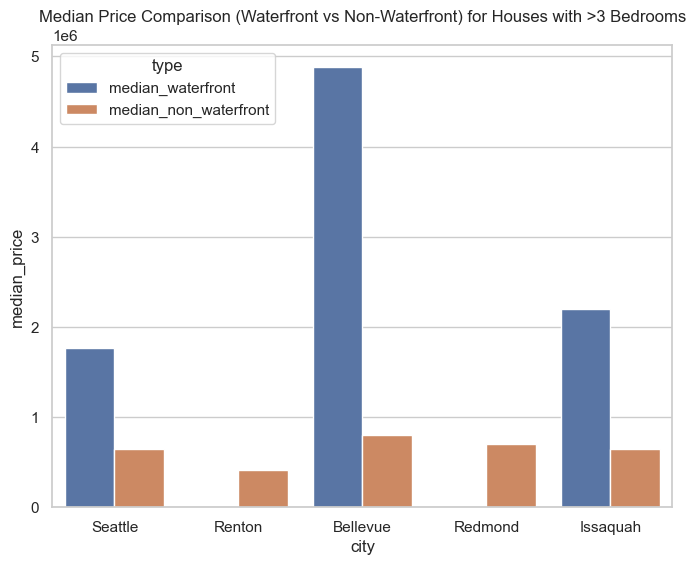

In [184]:
top_cities = data['city'].value_counts().head(5).index

price_comparison = []

for city in top_cities:
    city_df = data[data['city']==city]
    med_waterfront = city_df[(city_df['waterfront']==1) & (city_df['bedrooms']>3)]['price'].median()
    med_non_waterfront = city_df[(city_df['waterfront']==0) & (city_df['bedrooms']>3)]['price'].median()
    price_comparison.append([city, med_waterfront, med_non_waterfront])

comparison_df = pd.DataFrame(price_comparison, columns=['city', 'median_waterfront', 'median_non_waterfront'])
print(comparison_df)

# Plot to visually compare
comparison_melted = comparison_df.melt(id_vars='city', value_vars=['median_waterfront','median_non_waterfront'], var_name='type', value_name='median_price')

plt.figure(figsize=(8,6))
sns.barplot(x='city', y='median_price', hue='type', data=comparison_melted)
plt.title("Median Price Comparison (Waterfront vs Non-Waterfront) for Houses with >3 Bedrooms")
plt.show()

Hypothesis proven true, as desired - so, we may asssume we can learn the model as there are trends across citites which can help with evaluating the price

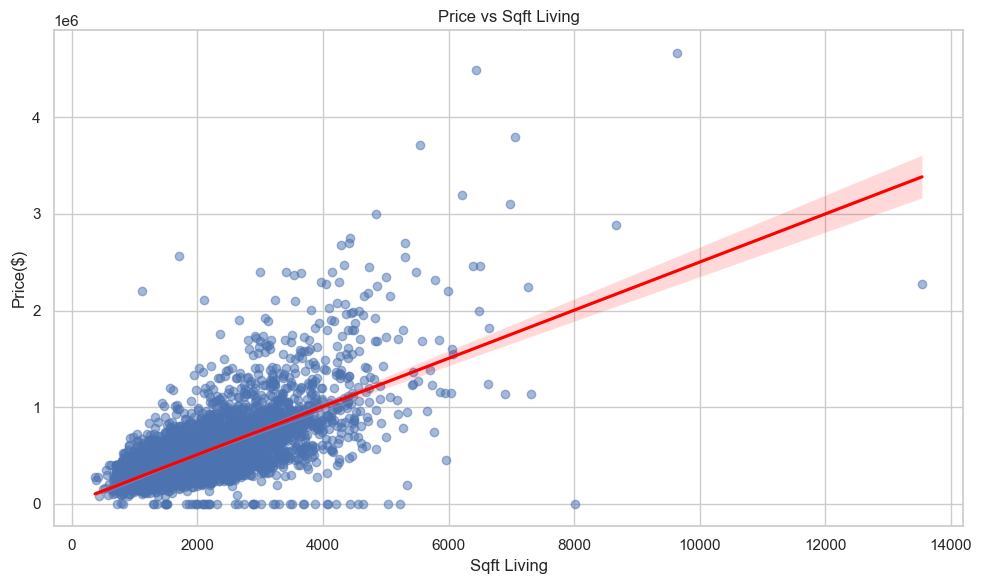

view
0    4138
2     204
3     116
4      70
1      69
Name: count, dtype: int64

In [185]:
data['last_changed'] = data[['yr_built', 'yr_renovated']].max(axis=1)
data['price_per_sqft_liv'] = data['price'] / data['sqft_living']
data = data[data['price'] <= 5000000]
plt.figure(figsize=(10, 6))
sns.regplot(x='sqft_living', y='price', data=data, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Price vs Sqft Living')
plt.xlabel('Sqft Living')
plt.ylabel('Price($)')
plt.tight_layout()
plt.show()

data = data[['date', 'price', 'bedrooms', 'bathrooms','sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'last_changed']]
data.view.value_counts()

Here, we improve our dataset: firstly, we'll change columns with year built and renovation as renovated house is almost the same as built at that point of time, so we take both of those columns. Also as shown area of living has a correlation with price of house and as we will see afterwards it is on og the greatest among other characteristics.

Thus, continuing our analysis we may see that there are not that many different values for view, amount of bathrooms and bedrooms, so let's find out the distribution. Also we need to look through data of prices to realise that there are some houses that are greatly out of range of most of house prices, so we adjust and get a distribution of prices.

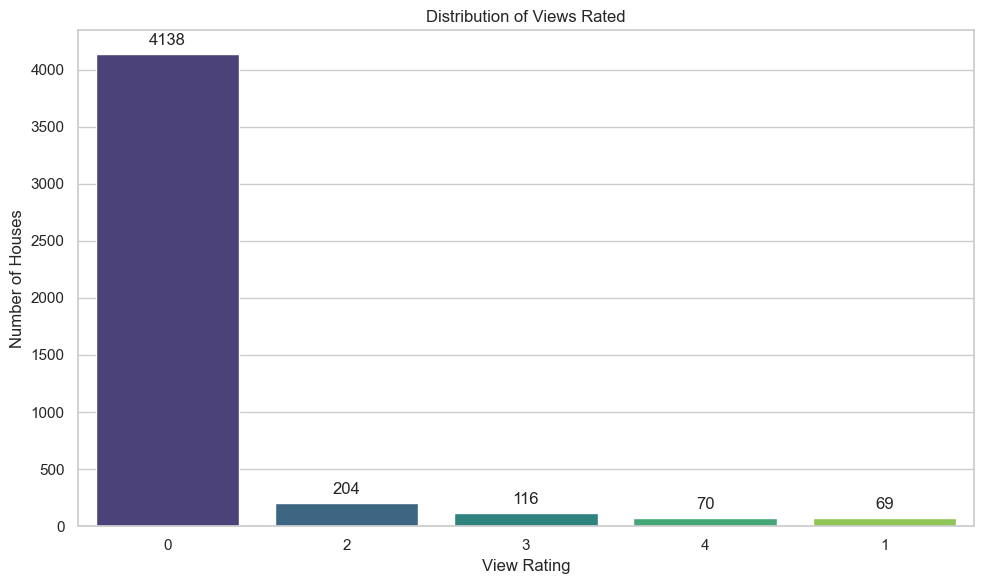

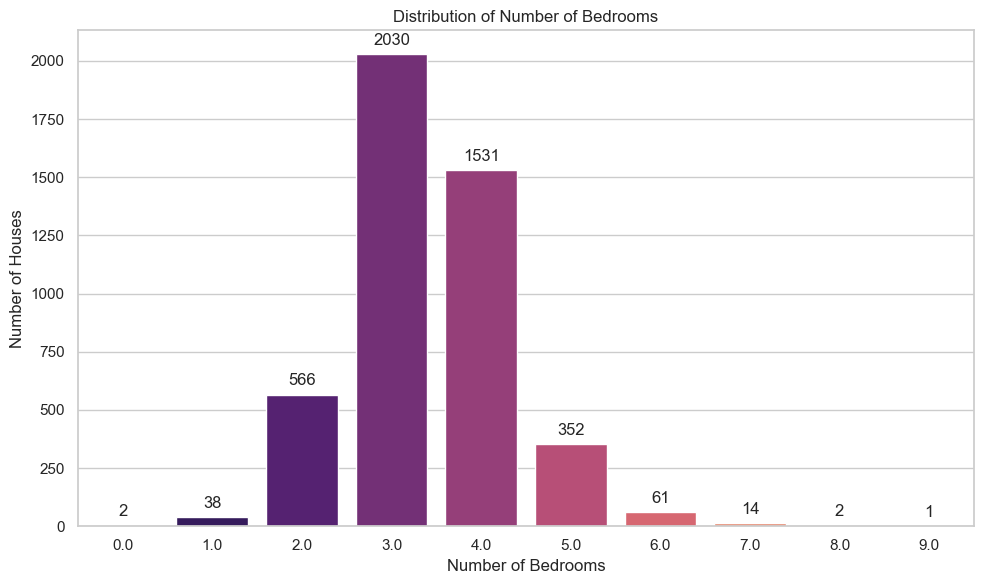

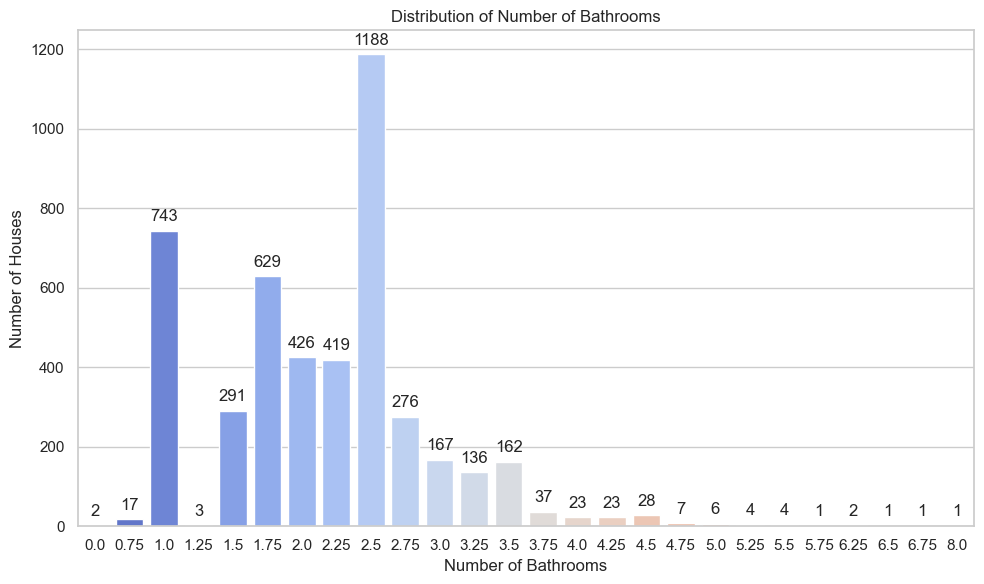

Price stats: count    4.597000e+03
mean     5.421967e+05
std      3.579301e+05
min      0.000000e+00
25%      3.225000e+05
50%      4.600000e+05
75%      6.530000e+05
max      4.668000e+06
Name: price, dtype: float64
Price - mean: 542196.7037147671 median: 460000.0 std: 357930.1385412037


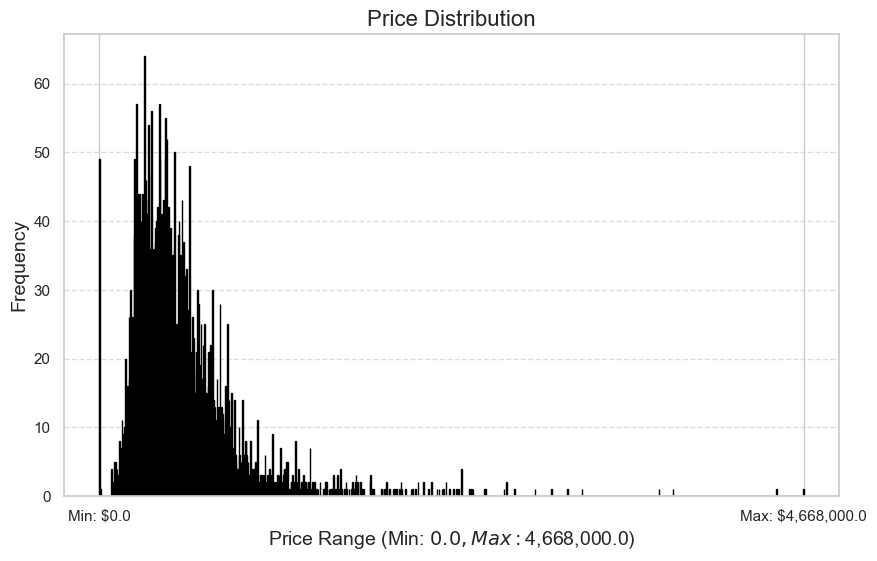

In [186]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='view', 
    data=data, 
    palette='viridis', 
    order=data['view'].value_counts().index
)
plt.title('Distribution of Views Rated')
plt.xlabel('View Rating')
plt.ylabel('Number of Houses')


plt.xticks(rotation=0)  


for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='bedrooms', 
    data=data, 
    palette='magma', 
    order=sorted(data['bedrooms'].unique())
)
plt.title('Distribution of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Houses')


plt.xticks(rotation=0)  


for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='bathrooms', 
    data=data, 
    palette='coolwarm', 
    order=sorted(data['bathrooms'].unique())
)
plt.title('Distribution of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Number of Houses')


plt.xticks(rotation=0)  


for p in ax.patches:
    ax.annotate(
        format(p.get_height(), '.0f'), 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha='center', 
        va='center', 
        xytext=(0, 10), 
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()

print("Price stats:",data['price'].describe())

price_mean = data['price'].mean()
price_median = data['price'].median()
price_std = data['price'].std()

print("Price - mean:", price_mean, "median:", price_median, "std:", price_std)


# 2. Price Distribution
min_price = data['price'].min()
max_price = data['price'].max()


plt.figure(figsize=(10, 6))
plt.hist(data['price'], bins=1000, edgecolor='black', alpha=1)
plt.title('Price Distribution', fontsize=16)
plt.xlabel(f'Price Range (Min: ${min_price:,}, Max: ${max_price:,})', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(ticks=[min_price, max_price], labels=[f'Min: ${min_price:,}', f'Max: ${max_price:,}'])
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Optional grid for better readability
plt.show()

In [187]:
from sklearn.model_selection import train_test_split

x = data.drop(['price'], axis = 1)
y = data['price']

In [188]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25)

In [197]:
train_data = x_train.join(y_train)
train_data.dtypes

date             float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
last_changed       int64
price            float64
dtype: object

Now, after processing the data and before learning the model we should look through the complete information on the distributions among all the criterias which will be used to get a desired price prediction (if there is any data which is out of range)

array([[<Axes: title={'center': 'date'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>],
       [<Axes: title={'center': 'view'}>,
        <Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>],
       [<Axes: title={'center': 'last_changed'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

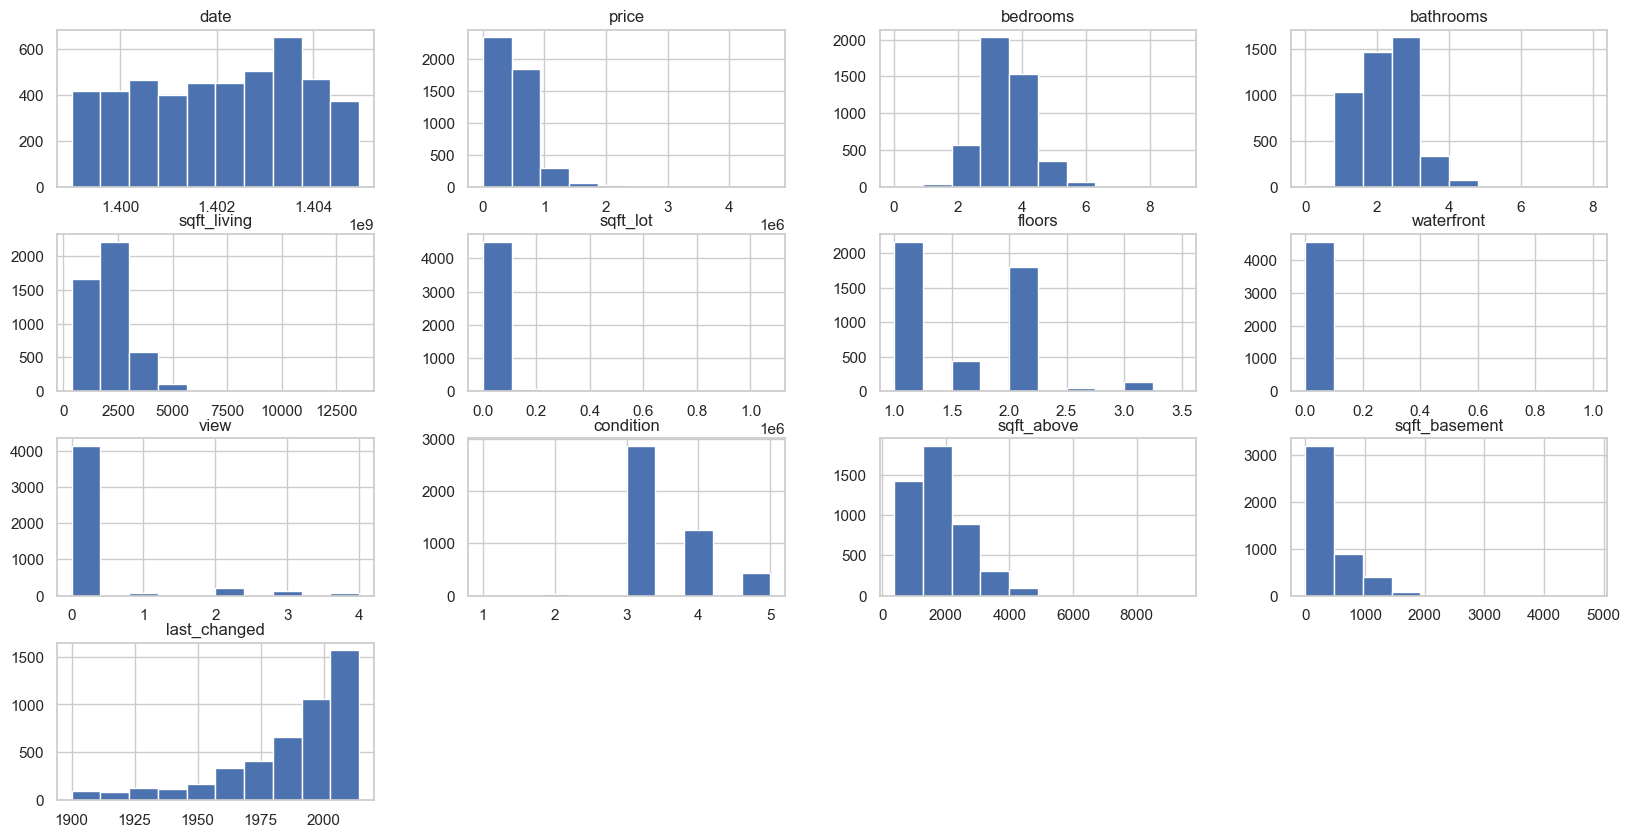

In [190]:
data.hist(figsize = (20,10))

Now, let's look at how each factor among those affect price (correlation)

<Axes: >

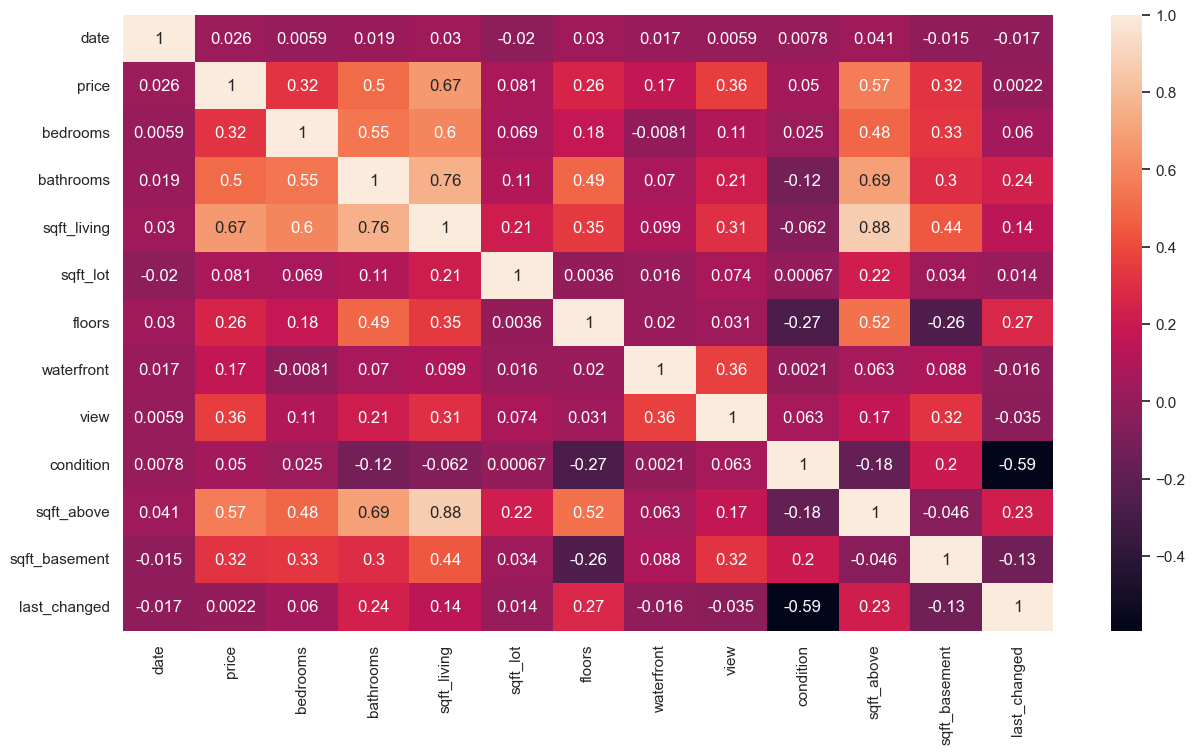

In [191]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True)

Now, let's use the model and evaluate the accuracy

In [192]:
from sklearn.linear_model import LinearRegression

x_train, y_train = train_data.drop(['price'], axis = 1), train_data['price']
test_data = x_test.join(y_test)

test_data
reg = LinearRegression()
reg.fit(x_train,y_train)
reg.score(x_test, y_test)

0.52332070902124

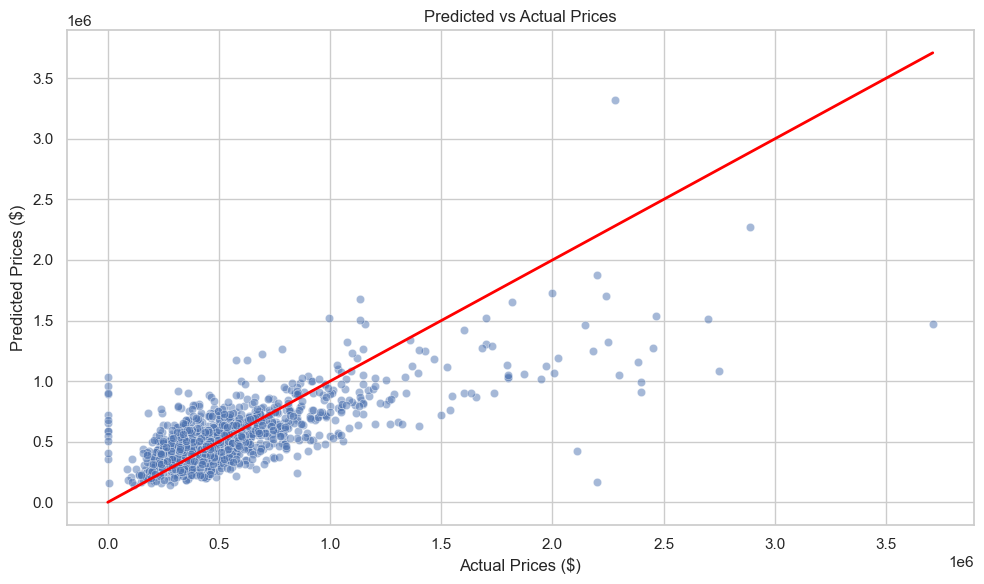

Mean Squared Error (MSE): 73995719698.44
R² Score: 0.52


In [193]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(x_test)


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # Diagonal line
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices ($)')
plt.ylabel('Predicted Prices ($)')
plt.tight_layout()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

In [194]:
import pickle
with open('linear_regression_model.pkl', 'wb') as f:
    pickle.dump(reg, f)